# Google Play Store EDA
> dataset is downloaded from [https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download](https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download)

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [49]:
# reading the dataset
df = pd.read_csv('../Datasets/googleplaystore.csv')

## Import thing

In [50]:
# max column & rows printing
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings('ignore')

## Meaning of each column name
1. App: Name of app
2. Category: category of app e.g: Game, Music,etc
3. Rating: Rating of app 0-5 good or bad
4. Reviews: Number of reviews of app
5. Size: Size of app in MB
6. Installs: Number of users or downloaders or  installers of an app
7. Type: Type of app e.g: Paid, Free, Trial, etc
8. Price: Price of app in USD, rupees etc
9. Content Rating: Content rating of app or type of users e.g: Everyone, Teen, Mature, etc
10. Genres: Genres of app e.g: Action, Adventure, Puzzle, etc
11. Last Updated: Last updated date of app
12. Current Ver: Current version of app
13. Android Ver: Minimum android version required to install app


## Get report by ydata_profiling library
``` python
import ydata_profiling as yp
report  = yp.ProfileReport(df)
report.to_file(output_file='../Outputs/googleplaystore_report.html')
```

## make a copy of original dataset to perform eda on it

In [51]:
df2 = df.copy()

## check the information of dataset

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## check sample data

In [53]:
df2.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6782,Bluetooth Auto Connect,COMMUNICATION,3.9,20829,1.9M,"5,000,000+",Free,0,Everyone,Communication,"November 17, 2017",4.5.4,3.0 and up
10794,PopStar,FAMILY,NaN,13,5.7M,"1,000+",Free,0,Everyone,Casual,"January 3, 2018",1.6,4.3 and up
1644,Relax Rain ~ Rain Sounds,LIFESTYLE,4.6,118034,Varies with device,"5,000,000+",Free,0,Everyone,Lifestyle,"August 2, 2018",Varies with device,Varies with device
5228,Tunnel Town,FAMILY,4.4,74744,60M,"1,000,000+",Free,0,Everyone,Strategy,"July 26, 2018",1.5.6,4.1 and up
5325,Al Quran Al karim,BOOKS_AND_REFERENCE,4.6,41608,49M,"1,000,000+",Free,0,Everyone,Books & Reference,"November 5, 2017",1.1.7,2.2 and up
3296,Super Flashlight + LED,TOOLS,4.3,54207,4.4M,"5,000,000+",Free,0,Everyone,Tools,"July 11, 2017",3.2,3.0 and up
258,Cisco Webex Teams,BUSINESS,4.2,1661,46M,"100,000+",Free,0,Everyone,Business,"August 2, 2018",3.0.4651,4.4 and up
9042,Tricky Bike Stunt Rider DX,FAMILY,4.4,16,45M,500+,Free,0,Everyone,Simulation;Education,"July 29, 2018",1.1.1,4.0 and up
1765,Wordscapes,GAME,4.8,230727,87M,"10,000,000+",Free,0,Everyone,Word,"August 2, 2018",1.0.47,4.1 and up
6221,BH by Kinomap,HEALTH_AND_FITNESS,2.9,141,22M,"10,000+",Free,0,Everyone,Health & Fitness,"July 30, 2018",3.2.9,4.1 and up


## check the percentage of null data

In [54]:
# finding percentage of missing values in each column
df2.isnull().sum() / len(df2) * 100

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.000000
Genres             0.009224
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
dtype: float64

## Find numeric variables columns and convert them to numeric
3. Size
4. Installs
5. Price

In [55]:
df2["Size"].value_counts()


Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

In [56]:
df2["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Total number of kb, Mb and other values are

In [57]:
# values having K in them, M or varies with size
M = df2["Size"].loc[df2["Size"].str.contains('M')].value_counts().sum()
K = df2["Size"].loc[df2["Size"].str.contains('k')].value_counts().sum()
Varies_with_device = df2["Size"].loc[df2["Size"].str.contains('Varies with device')].value_counts().sum()

print(f"The total number of M values are {M} , toal of k values are {K} and total of varies with device are {Varies_with_device}")

The total number of M values are 8830 , toal of k values are 316 and total of varies with device are 1695


In [58]:
# convert the whole size column to bytes
def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k',''))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [59]:
# lets apply the function to the size column
df2["Size"] = df2["Size"].apply(convert_size)

In [60]:
# renaming the column "size" to "Size in bytes"
df2.rename(columns={"Size" : "Size_in_bytes"}, inplace=True)

In [61]:
df2.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## adding another column size in mbs

In [62]:
df2["Size_in_MBs"] = df2["Size_in_bytes"].apply(lambda x: x/(1024**2))

In [63]:
df2["Size_in_KBs"] = df2["Size_in_bytes"].apply(lambda x: x/1024)

In [64]:
df2.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MBs,Size_in_KBs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


## Now lets take care of Installs column

In [65]:
# Replacing +, from Installs column
df2["Installs"]=df2["Installs"].str.replace("+","")
df2["Installs"]=df2["Installs"].str.replace(",","")

In [66]:
df2["Installs"] = df2["Installs"].astype(int)

## Lets make a new column for install category

In [67]:
# making a new column 'Installs_category' which will have install categories
bins = [-1,0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
labels = ['No','Very Low','Low','Moderate','More than moderate','High','Very High','Top Notch']
df2['Installs_category'] = pd.cut(df2['Installs'],bins = bins, labels = labels)

## Now lets do the same work for price column

In [68]:
# lets see how many values contains $ sign
df2.loc[df["Price"].str.contains('\$')].value_counts().sum()

np.int64(577)

In [69]:
df2.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [70]:
# Replacing $ sign from Price column
df2["Price"]=df2["Price"].str.replace("$","")

In [71]:
df2["Price"] = df2["Price"].astype(float)

In [72]:
df2.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_MBs,Size_in_KBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Find the Missing values

In [73]:
df2.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_KBs          1695
Size_in_MBs          1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [74]:
# finding missing values percentage
round(df2.isnull().sum() / len(df2) * 100,2).sort_values(ascending=False)

Size_in_bytes        15.64
Size_in_KBs          15.64
Size_in_MBs          15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
Category              0.01
Genres                0.01
Installs              0.00
App                   0.00
Reviews               0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

## Plot missing values

<Axes: >

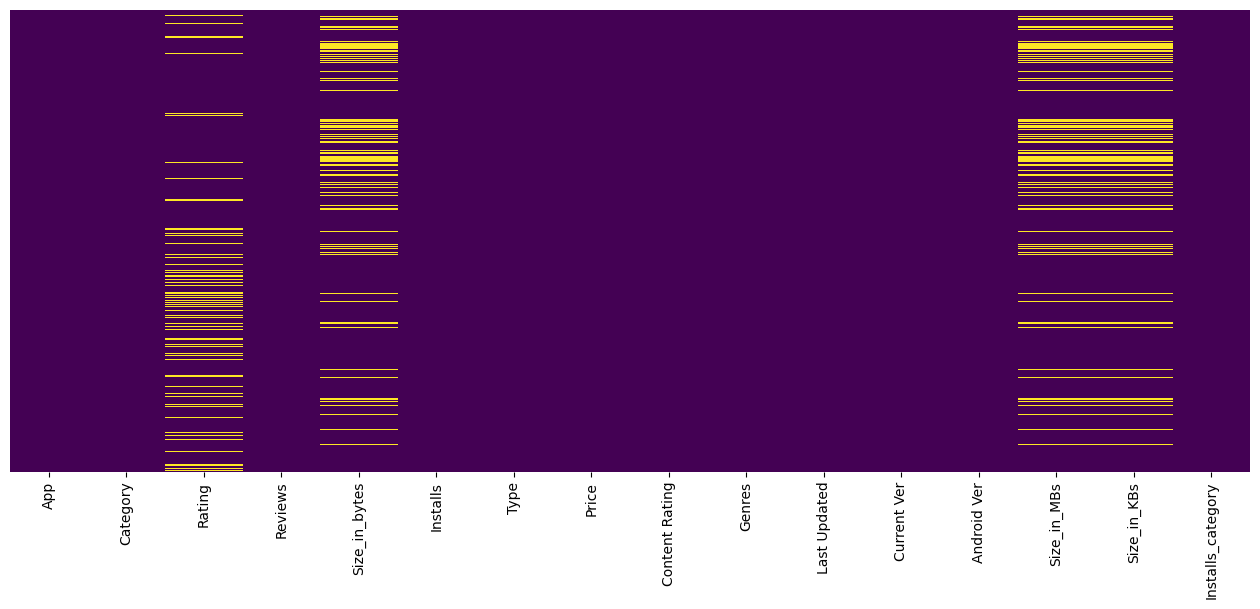

In [75]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df2.isnull(),cbar=False,cmap="viridis",yticklabels=False)

Text(0.5, 1.0, 'percentage of missing values')

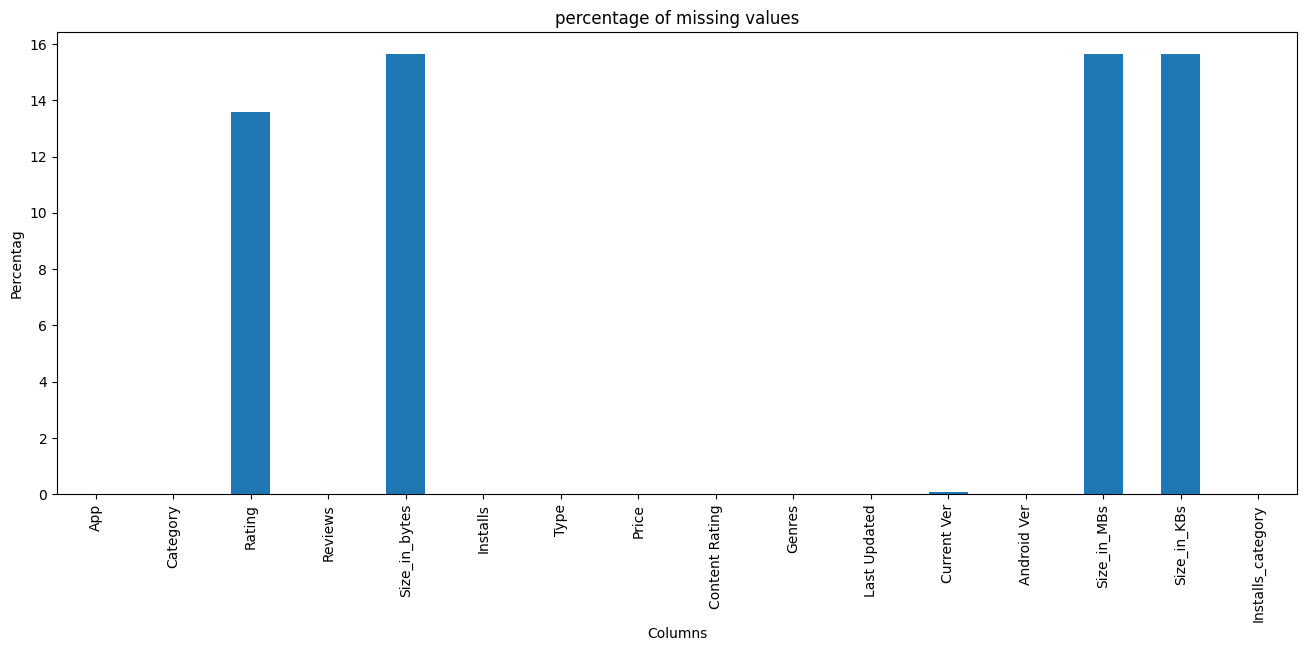

In [76]:
percentage_missing_values = df2.isnull().sum() / len(df2) * 100
plt.figure(figsize=(16,6))
percentage_missing_values.plot(kind="bar")
plt.ylabel("Percentag")
plt.xlabel("Columns")
plt.title("percentage of missing values")



<Axes: >

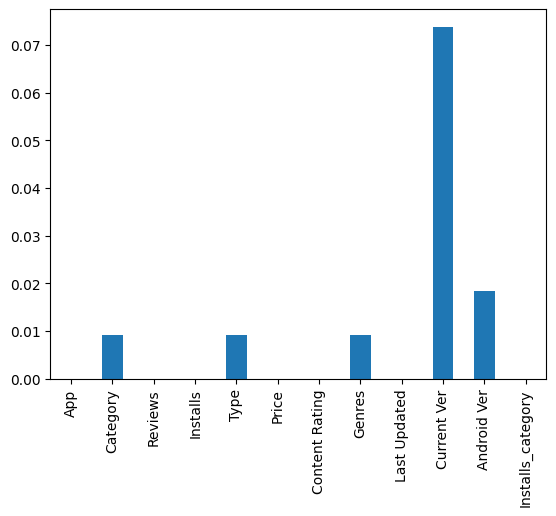

In [77]:
percentage_missing_values[percentage_missing_values < 1].plot(kind="bar")

# Finding out correlation  between two variables

<Axes: >

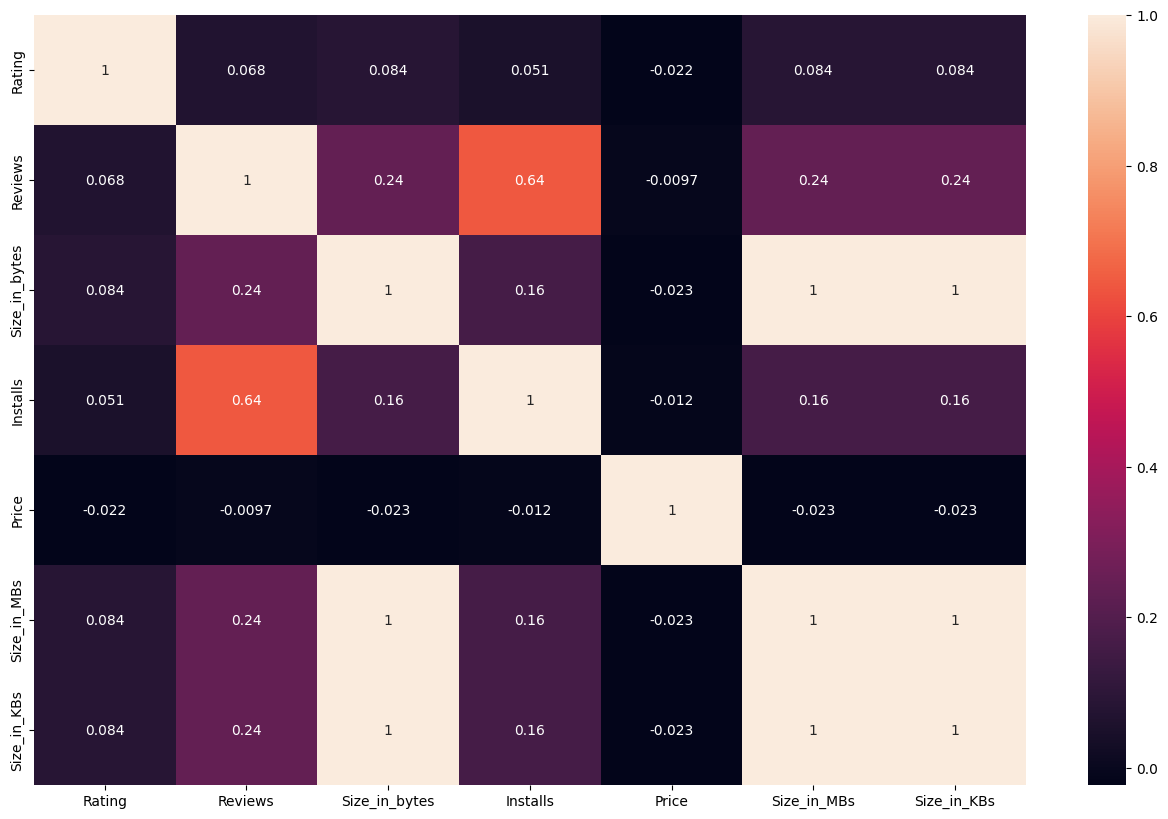

In [78]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16,10))
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price','Size_in_MBs', 'Size_in_KBs']
sns.heatmap(df2[numeric_cols].corr(),annot=True)


# Droping the null values

In [79]:
df2.dropna(subset=['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated','Current Ver', 'Android Ver'],inplace= True)


In [80]:
# length after removing missing values
print(f"Length of Dataframe after removing null or missing values {len(df2)}")

Length of Dataframe after removing null or missing values 10829


In [81]:
# lets check again for missing values
df2.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_KBs          1694
Size_in_MBs          1694
Rating               1469
Reviews                 0
Installs                0
Category                0
App                     0
Price                   0
Type                    0
Content Rating          0
Genres                  0
Current Ver             0
Last Updated            0
Android Ver             0
Installs_category       0
dtype: int64

In [82]:
# Use the group by function to find the trend of Rating in each category
df2.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,1359.0,4.198749,0.833807,1.0,3.9,4.4,4.8,5.0
Low,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
More than moderate,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Very High,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
Top Notch,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [83]:
# in which Installs_category the Rating has NaN values
df2["Installs_category"].loc[df2["Rating"].isnull()].value_counts()

Installs_category
Very Low              1333
Low                     88
Moderate                31
No                      14
More than moderate       3
High                     0
Very High                0
Top Notch                0
Name: count, dtype: int64

Text(7, 3.5, 'Null values : 0')

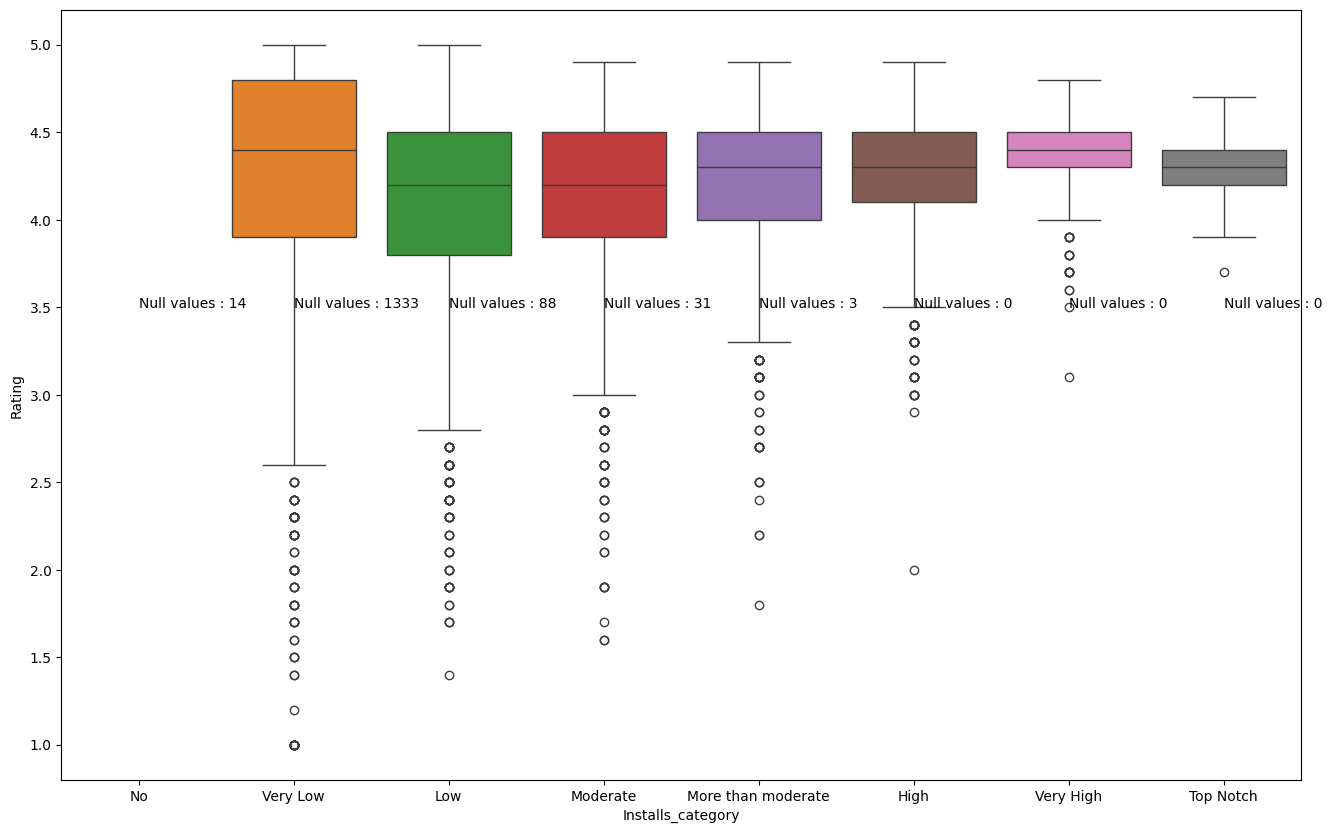

In [84]:
# Plot the Rating distribution in each Installs_category
plt.figure(figsize=(16,10))
sns.boxplot(x="Installs_category", y = "Rating",hue="Installs_category", data=df2)
plt.text(0,3.5,'Null values : 14')
plt.text(1,3.5,'Null values : 1333')
plt.text(2,3.5,'Null values : 88')
plt.text(3,3.5,'Null values : 31')
plt.text(4,3.5,'Null values : 3')
plt.text(5,3.5,'Null values : 0')
plt.text(6,3.5,'Null values : 0')
plt.text(7,3.5,'Null values : 0')

## Replace the respective missing values of rating, with respective to  the averages given in each Installs_category 

In [85]:
# Replace the respective missing values of rating, with respective to  the averages given in each Installs_category 
df2["Rating"] = df2.groupby("Installs_category")["Rating"].transform(lambda x: x.fillna(x.mean()))

## Check the duplicates.(If exists remove them)

In [86]:
df2.duplicated().sum()

np.int64(483)

In [87]:
# find exact duplicates and print them
df[df["App"].duplicated(keep=False)].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up


## Removes the duplicates

In [88]:
df2.drop_duplicates(inplace=True)

In [89]:
# Printing the number of rows after removing duplicates
print(f"Number of rows after removing duplicates : {len(df2)}")

Number of rows after removing duplicates : 10346


---
---
# Insights from Data
---
---

## 3.1 Which category have highest numbers of apps?

In [90]:
df2["Category"].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

## 3.2 Which Category have highest number of installs

In [91]:
df2.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

## 3.2 Which Category have highest number of Reviews

In [92]:
df2.groupby("Category")["Reviews"].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

## 3.2 Which Category have highest average Rating

In [93]:
df2.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)

Category
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
EVENTS                 4.357597
BOOKS_AND_REFERENCE    4.311342
PERSONALIZATION        4.304697
GAME                   4.277636
PARENTING              4.259759
HEALTH_AND_FITNESS     4.251901
SOCIAL                 4.246873
BEAUTY                 4.246788
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

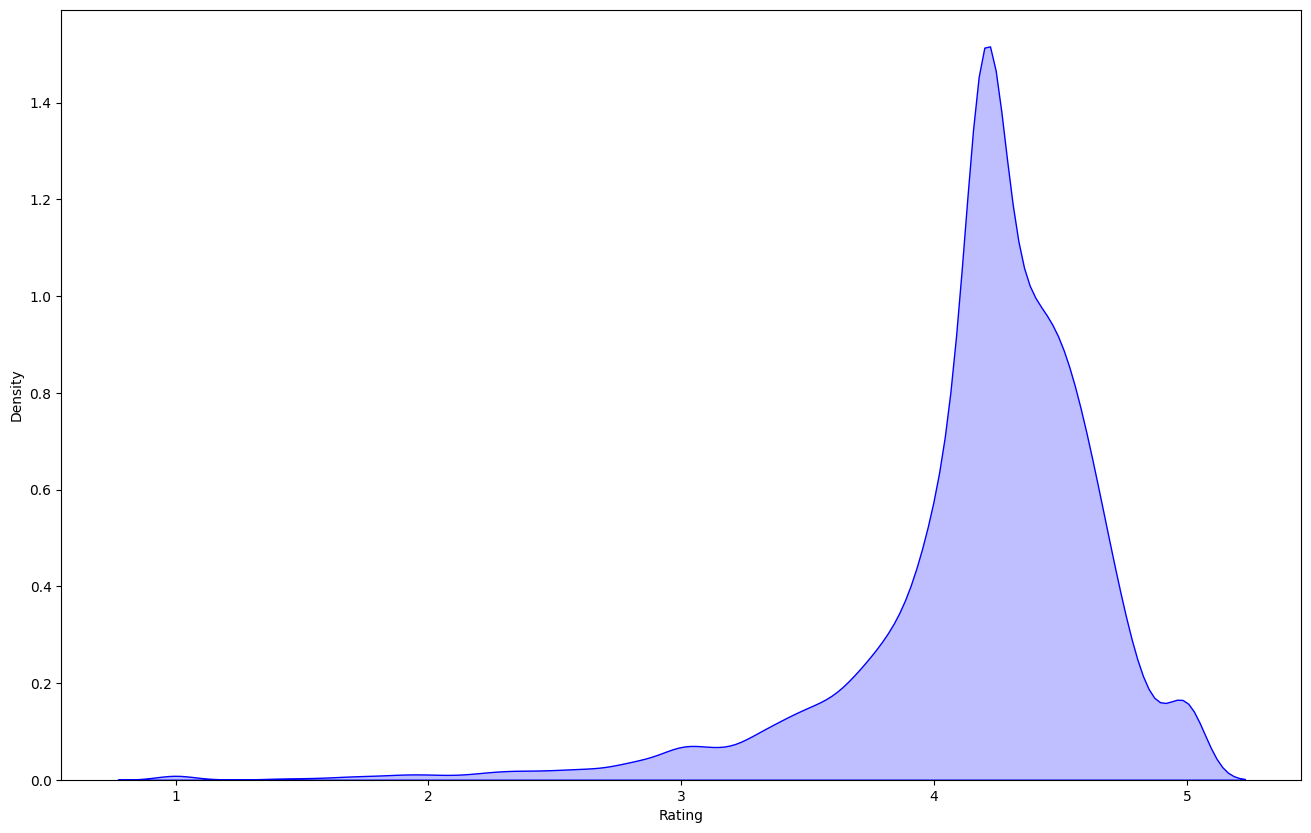

In [94]:
plt.figure(figsize=(16,10))
sns.kdeplot(df2["Rating"],color="blue",shade = True)

# Write more 15 questions made by your own knowlegde

In [95]:
df2.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MBs,Size_in_KBs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,More than moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,Moderate


## 3.3 What kind of app genere have less number of installers

In [96]:
df2.groupby("Genres")["Installs"].sum().sort_values(ascending=True).head(10)

Genres
Books & Reference;Creativity       100
Board;Pretend Play                 100
Trivia;Education                   100
Role Playing;Education             100
Books & Reference;Education      11000
Comics;Creativity                50000
Card;Brain Games                100000
Adventure;Brain Games           100000
Health & Fitness;Education      100000
Puzzle;Education                100000
Name: Installs, dtype: int64

## 3.4 which category is free or paid

In [97]:
df2.groupby("Category")["Price"].sum().sort_values(ascending=False).head(10)

Category
FINANCE            2900.83
FAMILY             2419.83
LIFESTYLE          2360.87
MEDICAL            1020.69
GAME                287.30
TOOLS               266.26
PRODUCTIVITY        250.93
BUSINESS            175.29
PERSONALIZATION     149.98
PHOTOGRAPHY         122.23
Name: Price, dtype: float64

## 3.5 Max Price of Apps

In [98]:
# df2.groupby("App")["Price"].sum().head(1)
df2[df2["Price"] == df2["Price"].max()]


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MBs,Size_in_KBs,Installs_category
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7654604.8,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.3,7475.2,Low
